In [1]:
import pandas as pd

#使用pandas读取元数据
data = pd.read_csv(filepath_or_buffer="../data/data2.csv").to_numpy()

In [2]:

import numpy as np
from paddle.io import Dataset
import paddle
import warnings 

warnings.filterwarnings("ignore")
print(paddle.__version__)


2.3.0


In [3]:
class LinearNet(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        # 定义一个单层的输入维度为一输出维度为一的网络
        self.fc = paddle.nn.Linear(in_features=2,out_features=1)

    def forward(self,input):
        # 处理输入的一维数据
        pred = self.fc(input)
        return pred

In [4]:
class LinearDataset(Dataset):
    def __init__(self,data: np.ndarray) -> None:
        super().__init__()
        self.data = data
    
    def __getitem__(self, idx):
        # 读取每一批次中输入与输出
        # 并以np的数组的格式返回
        x_y = self.data[idx][0:2]
        z = self.data[idx][2]
        x_y = np.array([x_y],dtype="float32")
        z = np.array([z],dtype="float32")
        return x_y,z
       

    def __len__(self):
        return self.data.shape[0]

In [5]:
train = LinearDataset(data=data)

In [6]:
# step3:训练模型
model = paddle.Model(LinearNet())
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.MSELoss())
model.fit(train_data=train, epochs=50, batch_size=1, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/50
step 100/100 [==============================] - loss: 745873.5625 - 3ms/step           
Epoch 2/50
step 100/100 [==============================] - loss: 576136.7500 - 2ms/step           
Epoch 3/50
step 100/100 [==============================] - loss: 598191.5625 - 2ms/step           
Epoch 4/50
step 100/100 [==============================] - loss: 335774.7812 - 2ms/step           
Epoch 5/50
step 100/100 [==============================] - loss: 632662.5625 - 2ms/step           
Epoch 6/50
step 100/100 [==============================] - loss: 1734762.6250 - 3ms/step         
Epoch 7/50
step 100/100 [==============================] - loss: 153668.5938 - 2ms/step          
Epoch 8/50
step 100/100 [==============================] - loss: 548435.5000 - 2ms/step          
Epoch 9/50
step 100/100 [==============================] - loss: 816676.8125 - 2ms/step          
Epo

In [7]:
model.save("../model/data2")

In [8]:

model = paddle.Model(LinearNet())
model.load("../model/data2")

In [19]:
trial_data = np.random.random(size=(10,2)).astype(np.float32)*10
a = model.predict_batch([trial_data])

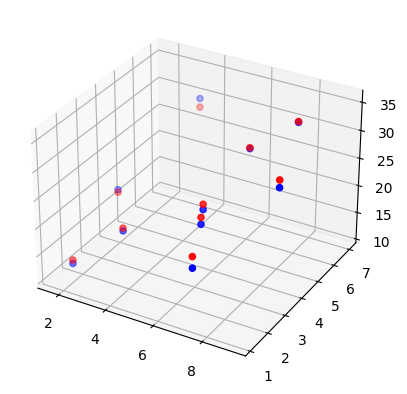

In [20]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
x = trial_data.T[0]
y = trial_data.T[1]
z = a[0].T[0]
ax.scatter(x,y,z,color='red')
ax.scatter(x,y,2*x+3*y+2,color='blue')

# 2.3显示
plt.show()